## Bike Sharing Demand
https://www.kaggle.com/c/bike-sharing-demand

### Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [56]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

# 한글폰트 설정
rc('font', family='AppleGothic')
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [26]:
train = pd.read_csv("train.csv") 
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
print(train.shape)
print(train.dtypes)

(10886, 12)
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [28]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [29]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [30]:
train["date"] = train.datetime.apply(lambda x: x.split()[0])
train["hour"] = train.datetime.apply(lambda x: x.split()[1].split(":")[0])

In [31]:
train["season"] = train.season.map({1: "spring", 2 : "summer", 3 : "fall", 4 :"winter" })
train["weather"] = train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",
                                      2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ",
                                      3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                                      4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [32]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour
0,2011-01-01 00:00:00,spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00
1,2011-01-01 01:00:00,spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01
2,2011-01-01 02:00:00,spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02
3,2011-01-01 03:00:00,spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03
4,2011-01-01 04:00:00,spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04


In [35]:
category_variable = ["hour","season","holiday","workingday", "weather"]
for var in category_variable:
    train[var] = train[var].astype("category")

In [37]:
del train["datetime"]

[Text(0.5, 1.0, '일하는 날에 따른 렌탈 수')]

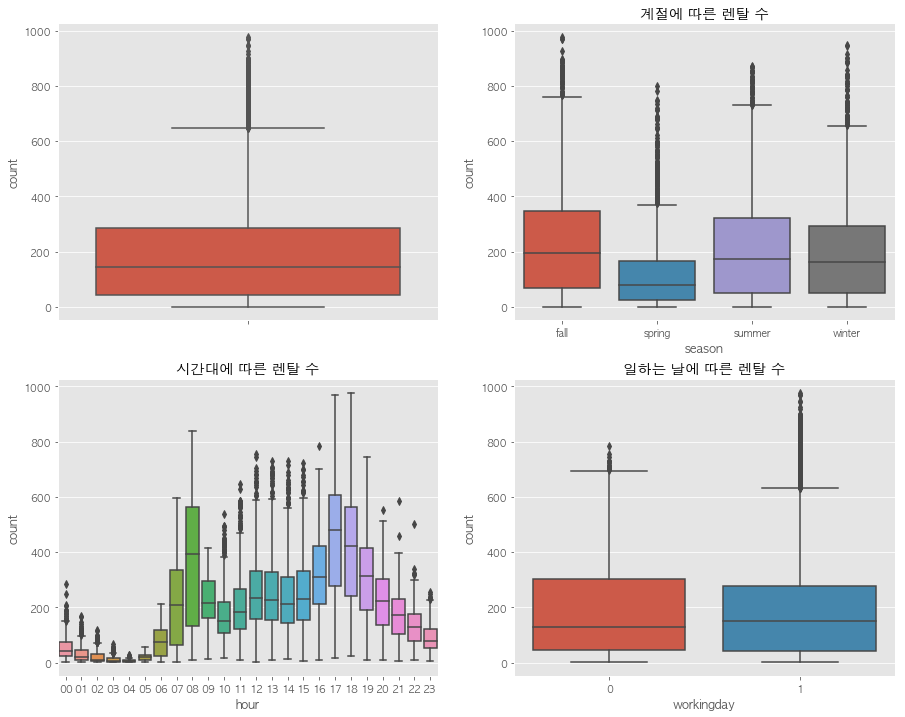

In [74]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 12)

sns.boxplot(data=train, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=train, y="count",x="season", orient="v", ax=axes[0][1])
sns.boxplot(data=train, y="count",x="hour", orient="v", ax=axes[1][0])
sns.boxplot(data=train, y="count",x="workingday", orient="v", ax=axes[1][1])

axes[0][0].set()
axes[0][1].set(title="계절에 따른 렌탈 수")
axes[1][0].set(title="시간대에 따른 렌탈 수")
axes[1][1].set(title="일하는 날에 따른 렌탈 수")

In [66]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

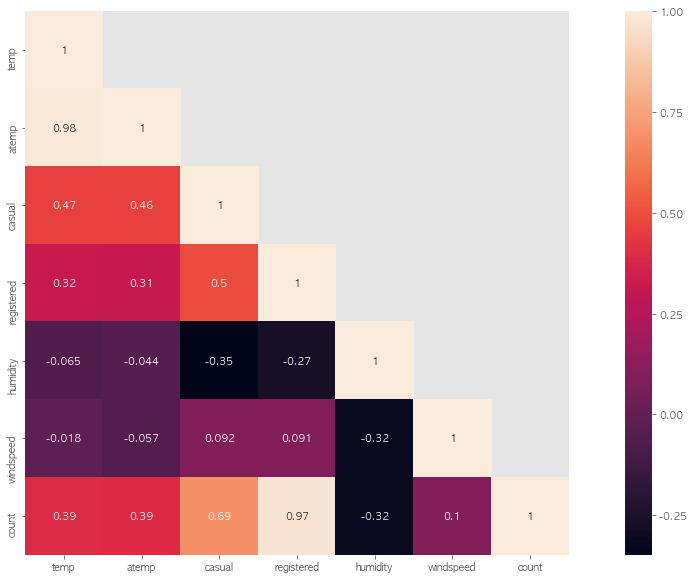

In [71]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask, square=True,annot=True)

[Text(0, 0.5, '렌탈 수'),
 Text(0.5, 0, '시간대'),
 Text(0.5, 1.0, '계절에 따른 시간대별 렌탈 수'),
 None]

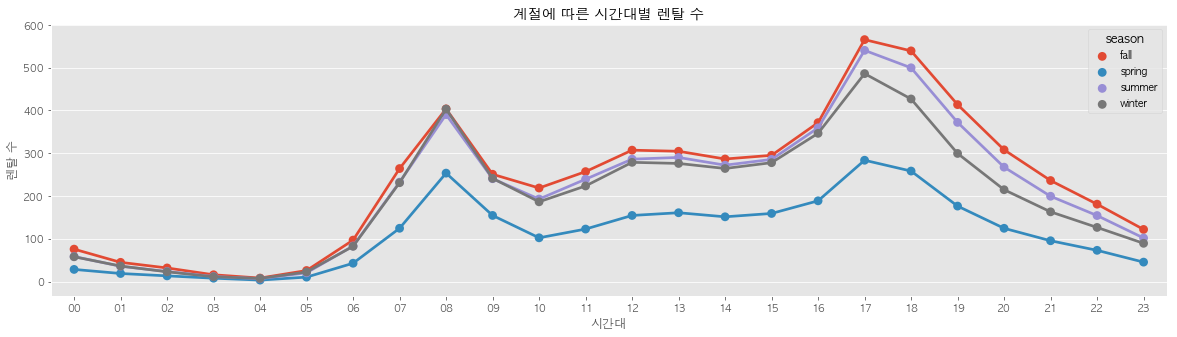

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)

hours = pd.DataFrame(train.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hours["hour"], y=hours["count"], hue=hours["season"], data=hours, join=True, ax=ax)
ax.set(xlabel='시간대', ylabel='렌탈 수',title="계절에 따른 시간대별 렌탈 수",label='big')

[Text(0, 0.5, '렌탈 수'),
 Text(0.5, 0, '시간대'),
 Text(0.5, 1.0, '휴일의 시간대별 렌탈 수'),
 None]

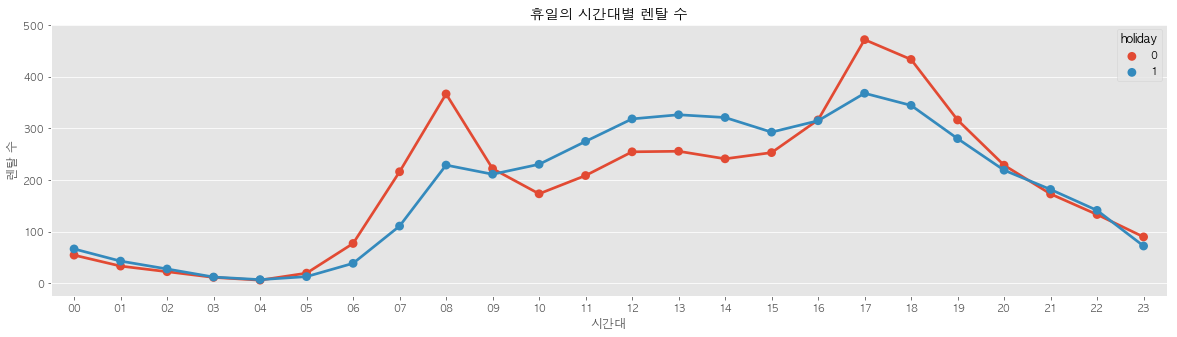

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)

hours = pd.DataFrame(train.groupby(["hour","holiday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hours["hour"], y=hours["count"], hue=hours["holiday"], data=hours, join=True, ax=ax)
ax.set(xlabel='시간대', ylabel='렌탈 수',title="휴일의 시간대별 렌탈 수",label='big')

[Text(0, 0.5, '렌탈 수'),
 Text(0.5, 0, '시간대'),
 Text(0.5, 1.0, '일하는 날의 시간대별 렌탈 수'),
 None]

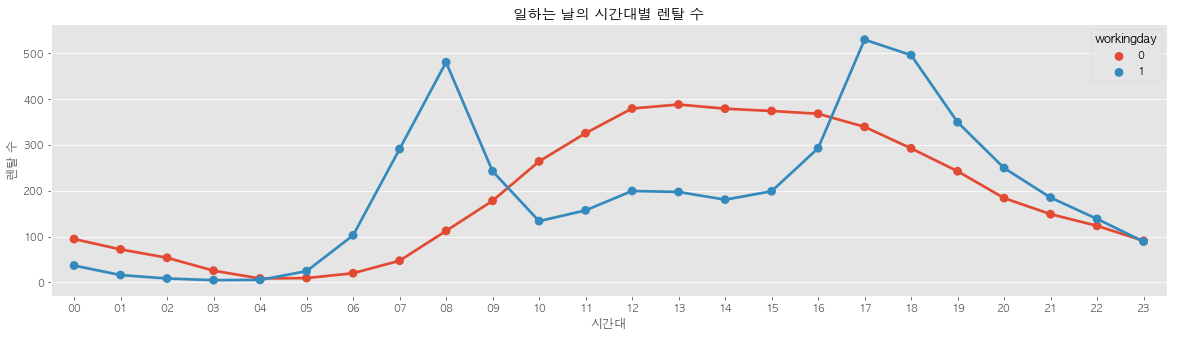

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)

hours = pd.DataFrame(train.groupby(["hour","workingday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hours["hour"], y=hours["count"], hue=hours["workingday"], data=hours, join=True, ax=ax)
ax.set(xlabel='시간대', ylabel='렌탈 수',title="일하는 날의 시간대별 렌탈 수",label='big')